In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [15]:
from sklearn.utils import Bunch

iris = Bunch()
print(type(iris))
iris.frame = pd.read_csv('iris.csv')
print(iris.keys())
iris.frame.sample(5)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['frame'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
98,5.1,2.5,3.0,1.1,versicolor
101,5.8,2.7,5.1,1.9,virginica
16,5.4,3.9,1.3,0.4,setosa
143,6.8,3.2,5.9,2.3,virginica
33,5.5,4.2,1.4,0.2,setosa


In [16]:
iris.target = iris.frame['label']
iris.target = iris.target.map({'setosa':0, 'versicolor':1, 'virginica':2})
iris.target.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
iris.data = iris.frame.drop(columns = 'label')
iris.feature_names = iris.data.columns.tolist()
print(iris.feature_names)
iris.data.sample(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
135,7.7,3.0,6.1,2.3
6,4.6,3.4,1.4,0.3
141,6.9,3.1,5.1,2.3
119,6.0,2.2,5.0,1.5
19,5.1,3.8,1.5,0.3


In [18]:
import joblib

joblib.dump(iris, 'iris.joblib')

['iris.joblib']

In [19]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())
iris.frame.sample(5)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2
4,5.0,3.6,1.4,0.2,0
111,6.4,2.7,5.3,1.9,2
86,6.7,3.1,4.7,1.5,1
58,6.6,2.9,4.6,1.3,1


In [20]:
표본수 = len(iris.frame)
시험데이터비율 = 0.25
시험데이터수 = round(표본수 * 시험데이터비율)
print(f'{시험데이터수}/{표본수}')

38/150


In [21]:
난수생성기 = np.random.default_rng(1)
무작위순서 = 난수생성기.permutation(표본수)

In [22]:
train_data = iris.data.iloc[무작위순서][:-시험데이터수]
test_data = iris.data.iloc[무작위순서][-시험데이터수:]

train_target = iris.target[무작위순서][:-시험데이터수]
test_target = iris.target[무작위순서][-시험데이터수:]

print(train_data.shape, test_data.shape)
print(train_target.shape, test_target.shape)

(112, 4) (38, 4)
(112,) (38,)


In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data, iris.target, test_size=0.25, shuffle=True, random_state=0, stratify=iris.target
)

print(train_data.shape, test_data.shape)

(112, 4) (38, 4)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data, train_target)

예측 = model.predict(test_data)
채점 = 예측 == test_target
print(f'{sum(채점)}/{len(채점)}')

37/38


In [26]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.target[:5])
housing.frame.sample(5).round(2)

HTTPError: HTTP Error 403: Forbidden

In [27]:
iris.data.to_numpy()[:3, [0, 2]]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

y_pred = [0 1]


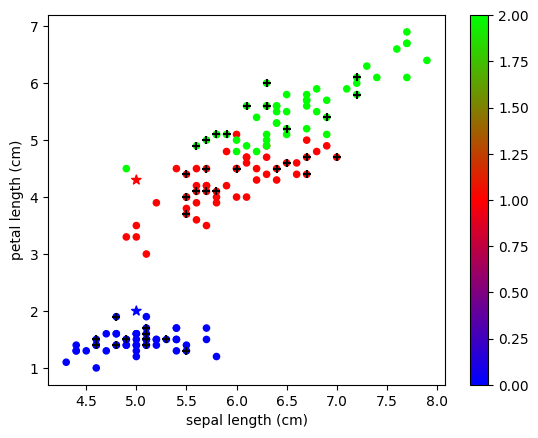

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data.iloc[:, [0, 2]].to_numpy(), iris.target, test_size = 0.25, random_state=0, stratify=iris.target
)
이웃수 = 3

model = KNeighborsClassifier(n_neighbors=이웃수)
model.fit(train_data, train_target)

iris.frame.plot(kind='scatter', x=0, y=2, c=iris.target,cmap='brg')
plt.scatter(test_data[:,0], test_data[:,1], marker='+', c='black')

new_data = np.array([(5.0, 2.0), (5.0, 4.3)])
예측 = model.predict(new_data)
print(f'y_pred = {예측}')
유형별색상맵핑 = np.array(['blue', 'red', 'green'])
plt.scatter(new_data[:,0], new_data[:,1], marker='*', s=50, c=유형별색상맵핑[예측])
plt.show()

In [33]:
거리산출 = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

xq = new_data[0]

거리 = []
for xi in train_data:
    거리.append(거리산출(xq, xi))

거리 = pd.Series(거리)
최인접이웃 = 거리.idxmin()
print(f'최인접이웃: {최인접이웃}, xi: {train_data[최인접이웃]}')
거리.sort_values(ascending=True).head().round(2)

최인접이웃: 41, xi: [5.1 1.9]


41    0.14
14    0.40
9     0.40
79    0.40
54    0.45
dtype: float64

In [38]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)
print(cancer.data.shape)
print(cancer.target_names)
print(cancer.target.value_counts())
print(cancer.keys())
cancer.frame.sample(5).round(2)

(569, 30)
['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
548,9.68,19.34,61.05,285.7,0.08,0.05,0.02,0.01,0.16,0.06,...,25.59,69.1,364.2,0.12,0.10,0.09,0.04,0.26,0.08,1
182,15.70,20.31,101.20,766.6,0.10,0.09,0.07,0.05,0.16,0.06,...,32.82,129.3,1269.0,0.14,0.35,0.29,0.15,0.34,0.09,0
11,15.78,17.89,103.60,781.0,0.10,0.13,0.10,0.07,0.18,0.06,...,27.28,136.5,1299.0,0.14,0.56,0.40,0.18,0.38,0.10,0
95,20.26,23.03,132.40,1264.0,0.09,0.13,0.15,0.09,0.21,0.06,...,31.59,156.1,1750.0,0.12,0.35,0.41,0.16,0.37,0.08,0
207,17.01,20.26,109.70,904.3,0.09,0.07,0.07,0.05,0.20,0.05,...,25.05,130.0,1210.0,0.11,0.15,0.19,0.11,0.33,0.06,0


In [45]:
열별최소값 = cancer.data.min()
열별최대값 = cancer.data.max()

cancer_data_scaled = (cancer.data - 열별최소값)/(열별최대값 - 열별최소값)
cancer_data_scaled.apply([min, max]).round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [52]:
samples = np.linspace(0, 1, 12).reshape(3, 4)
print(samples.round(2))
print(samples.mean())
print(samples.mean(axis=0).round(2))
print(samples.mean(axis=1).round(2))

[[0.   0.09 0.18 0.27]
 [0.36 0.45 0.55 0.64]
 [0.73 0.82 0.91 1.  ]]
0.5
[0.36 0.45 0.55 0.64]
[0.14 0.5  0.86]


In [55]:
print(200*1.1)
print(200 == 200 * 1.1)
assert np.isclose(220, 200*1.1)

220.00000000000003
False


In [59]:
from sklearn.preprocessing import MinMaxScaler

train_data, test_data, train_target, test_target = train_test_split(cancer.data, cancer.target, test_size = 0.25, random_state = 2, stratify = cancer.target)

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

assert np.allclose(train_data.min(axis=0), 0) and np.allclose(train_data.max(axis=0), 1)

print(train_data.shape, test_data.shape)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_data, train_target)

예측 = model.predict(test_data)
채점 = 예측 == test_target
print(채점.sum())

(426, 30) (143, 30)
136


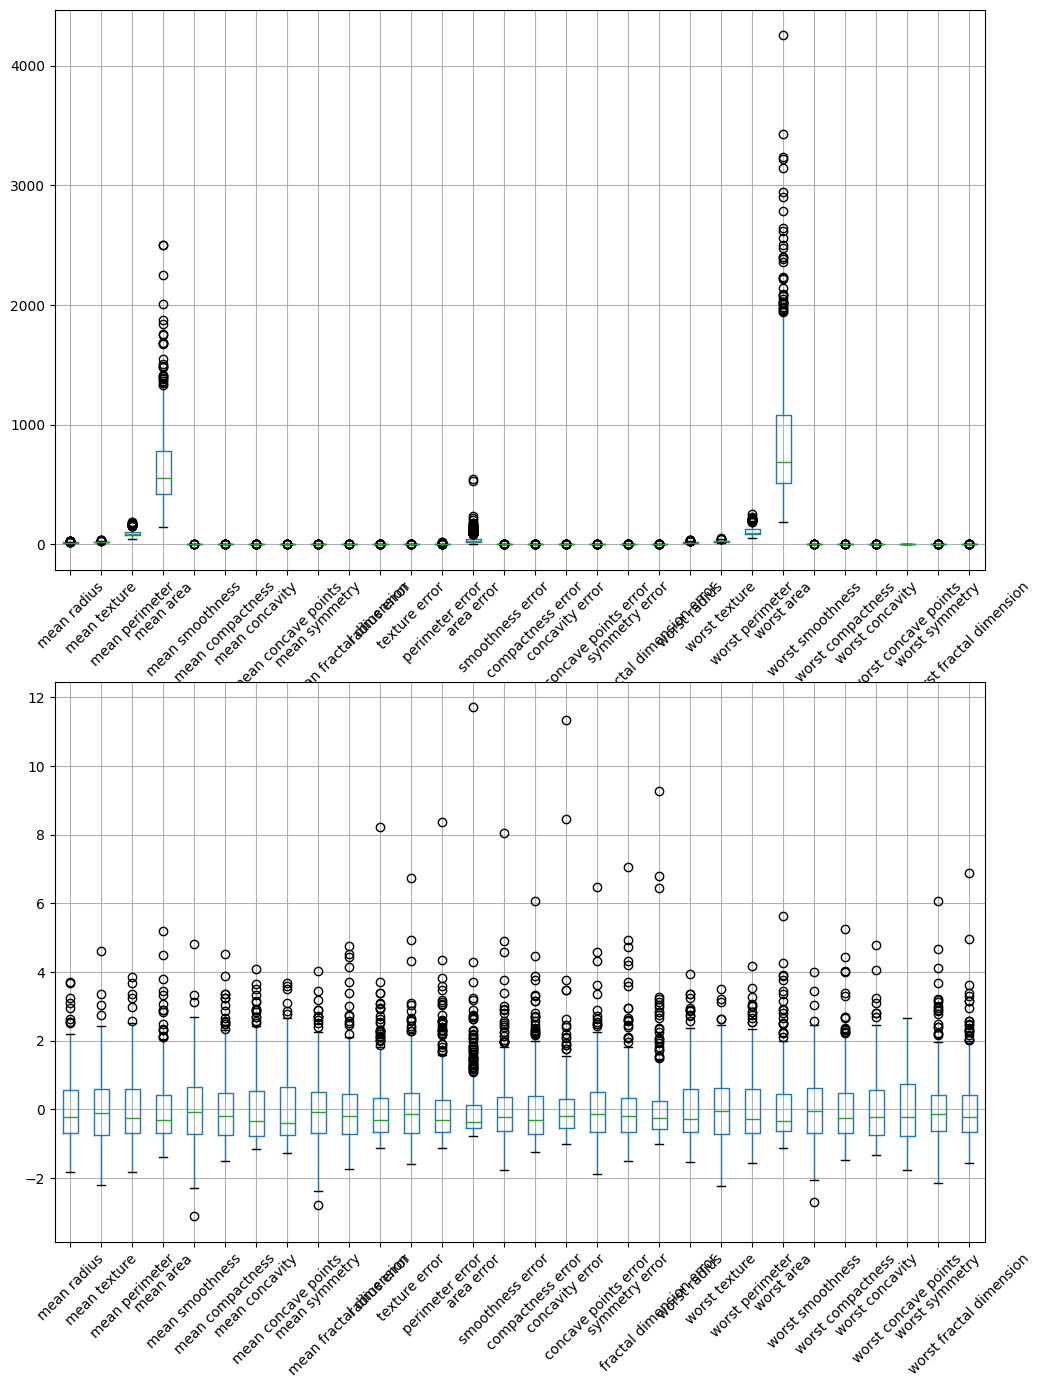

In [63]:
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_target, test_target = train_test_split(
    cancer.data, cancer.target, test_size=0.25, random_state=2, stratify=cancer.target)

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
assert np.allclose(train_data.mean(axis=0), 0) and np.allclose(train_data.std(axis=0), 1)

plt.figure(figsize=(12, 16))
plt.subplot(2, 1, 1)
cancer.data.boxplot(rot = 45)
plt.subplot(2, 1, 2)
pd.DataFrame(train_data, columns=cancer.feature_names).boxplot(rot=45)
plt.show()